# Task 6.1: Sourcing Open Data

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Defining a path
path = r'/Users/hectorvargas/Desktop/Career_Foundry/12-2022 Gun Violence Analysis'

In [7]:
# Importing data
df = pd.read_csv(os.path.join(path, '02 Data','Original Data', 'gun-violence-data.csv'))

## Exploring Dataframe & Cleaning

In [29]:
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [8]:
df.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district'],
      dtype='object')

In [55]:
#Create an independent copy of the data frame to select only relevant columns for my analysis
df1 = df[['participant_age_group','state','date','participant_gender','n_killed']].copy()

In [56]:
df1['Childs'] = df1.participant_age_group.str.count('Child 0-11')
df1['Teens'] = df1.participant_age_group.str.count('Teen 12-17')
df1['Adults'] = df1.participant_age_group.str.count('Adult 18+')

In [57]:
df1['Male'] = df1.participant_gender.str.count('Male')
df1['Female'] = df1.participant_gender.str.count('Female')

In [58]:
df1.columns

Index(['participant_age_group', 'state', 'date', 'participant_gender',
       'n_killed', 'Childs', 'Teens', 'Adults', 'Male', 'Female'],
      dtype='object')

In [59]:
df1.head()

,participant_age_group,state,date,participant_gender,n_killed,Childs,Teens,Adults,Male,Female
0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,Pennsylvania,2013-01-01,0::Male||1::Male||3::Male||4::Female,0,0.0,0.0,5.0,3.0,1.0
1,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,California,2013-01-01,0::Male,1,0.0,0.0,4.0,1.0,0.0
2,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,Ohio,2013-01-01,0::Male||1::Male||2::Male||3::Male||4::Male,1,0.0,0.0,5.0,5.0,0.0
3,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,Colorado,2013-01-05,0::Female||1::Male||2::Male||3::Male,4,0.0,0.0,4.0,3.0,1.0
4,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,North Carolina,2013-01-07,0::Female||1::Male||2::Male||3::Female,2,0.0,1.0,3.0,2.0,2.0


In [60]:
df1.shape

(239677, 10)

In [85]:
# Checking dataframe columns count
df1.isna().count()


participant_age_group    239677
state                    239677
date                     239677
participant_gender       239677
n_killed                 239677
Childs                   239677
Teens                    239677
Adults                   239677
Male                     239677
Female                   239677
dtype: int64

In [91]:
# Looking for missing values
df1.isna().sum()


# we found a lot of missing values

participant_age_group    42119
state                        0
date                         0
participant_gender       36362
n_killed                     0
Childs                   42119
Teens                    42119
Adults                   42119
Male                     36362
Female                   36362
dtype: int64

In [62]:
df1[df1['Childs'].isna()]

,participant_age_group,state,date,participant_gender,n_killed,Childs,Teens,Adults,Male,Female
7,NaN,Louisiana,2013-01-21,0::Male||1::Male||2::Male||3::Male||4::Male,0,NaN,NaN,NaN,5.0,0.0
38,NaN,California,2013-03-16,NaN,0,NaN,NaN,NaN,NaN,NaN
40,NaN,Florida,2013-03-17,NaN,0,NaN,NaN,NaN,NaN,NaN
92,NaN,Indiana,2013-06-02,NaN,0,NaN,NaN,NaN,NaN,NaN
119,NaN,New York,2013-06-30,0::Male||1::Male||2::Male||3::Male||4::Female|...,0,NaN,NaN,NaN,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...
239644,NaN,New York,2018-03-31,NaN,0,NaN,NaN,NaN,NaN,NaN
239648,NaN,District of Columbia,2018-03-31,NaN,0,NaN,NaN,NaN,NaN,NaN
239656,NaN,New York,2018-03-31,0::Female,1,NaN,NaN,NaN,0.0,1.0
239668,NaN,Michigan,2018-03-31,0::Male,0,NaN,NaN,NaN,1.0,0.0


In [80]:
# Values 'childs'
pd.DataFrame(df1['Adults'].value_counts())

,Adults
1.0,106461
2.0,54412
3.0,15946
0.0,11543
4.0,5818
5.0,2060
6.0,733
7.0,293
8.0,121
9.0,48


In [63]:
# General feel of the data frame
df1.describe()

,n_killed,Childs,Teens,Adults,Male,Female
count,239677.000000,197558.000000,197558.000000,197558.000000,203315.000000,203315.000000
mean,0.252290,0.023122,0.129658,1.551114,1.520257,0.212340
std,0.521779,0.186675,0.455715,1.083951,0.996762,0.490888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000
max,50.000000,11.000000,27.000000,103.000000,61.000000,23.000000


In [65]:
df1.dtypes

participant_age_group     object
state                     object
date                      object
participant_gender        object
n_killed                   int64
Childs                   float64
Teens                    float64
Adults                   float64
Male                     float64
Female                   float64
dtype: object

In [66]:
#looking for the value over 100 in Adults
df1[df1['Adults']>100]

,participant_age_group,state,date,participant_gender,n_killed,Childs,Teens,Adults,Male,Female
130448,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,Florida,2016-06-12,0::Male||1::Male||2::Male||3::Male||4::Male||5...,50,0.0,0.0,103.0,61.0,17.0


<AxesSubplot:>

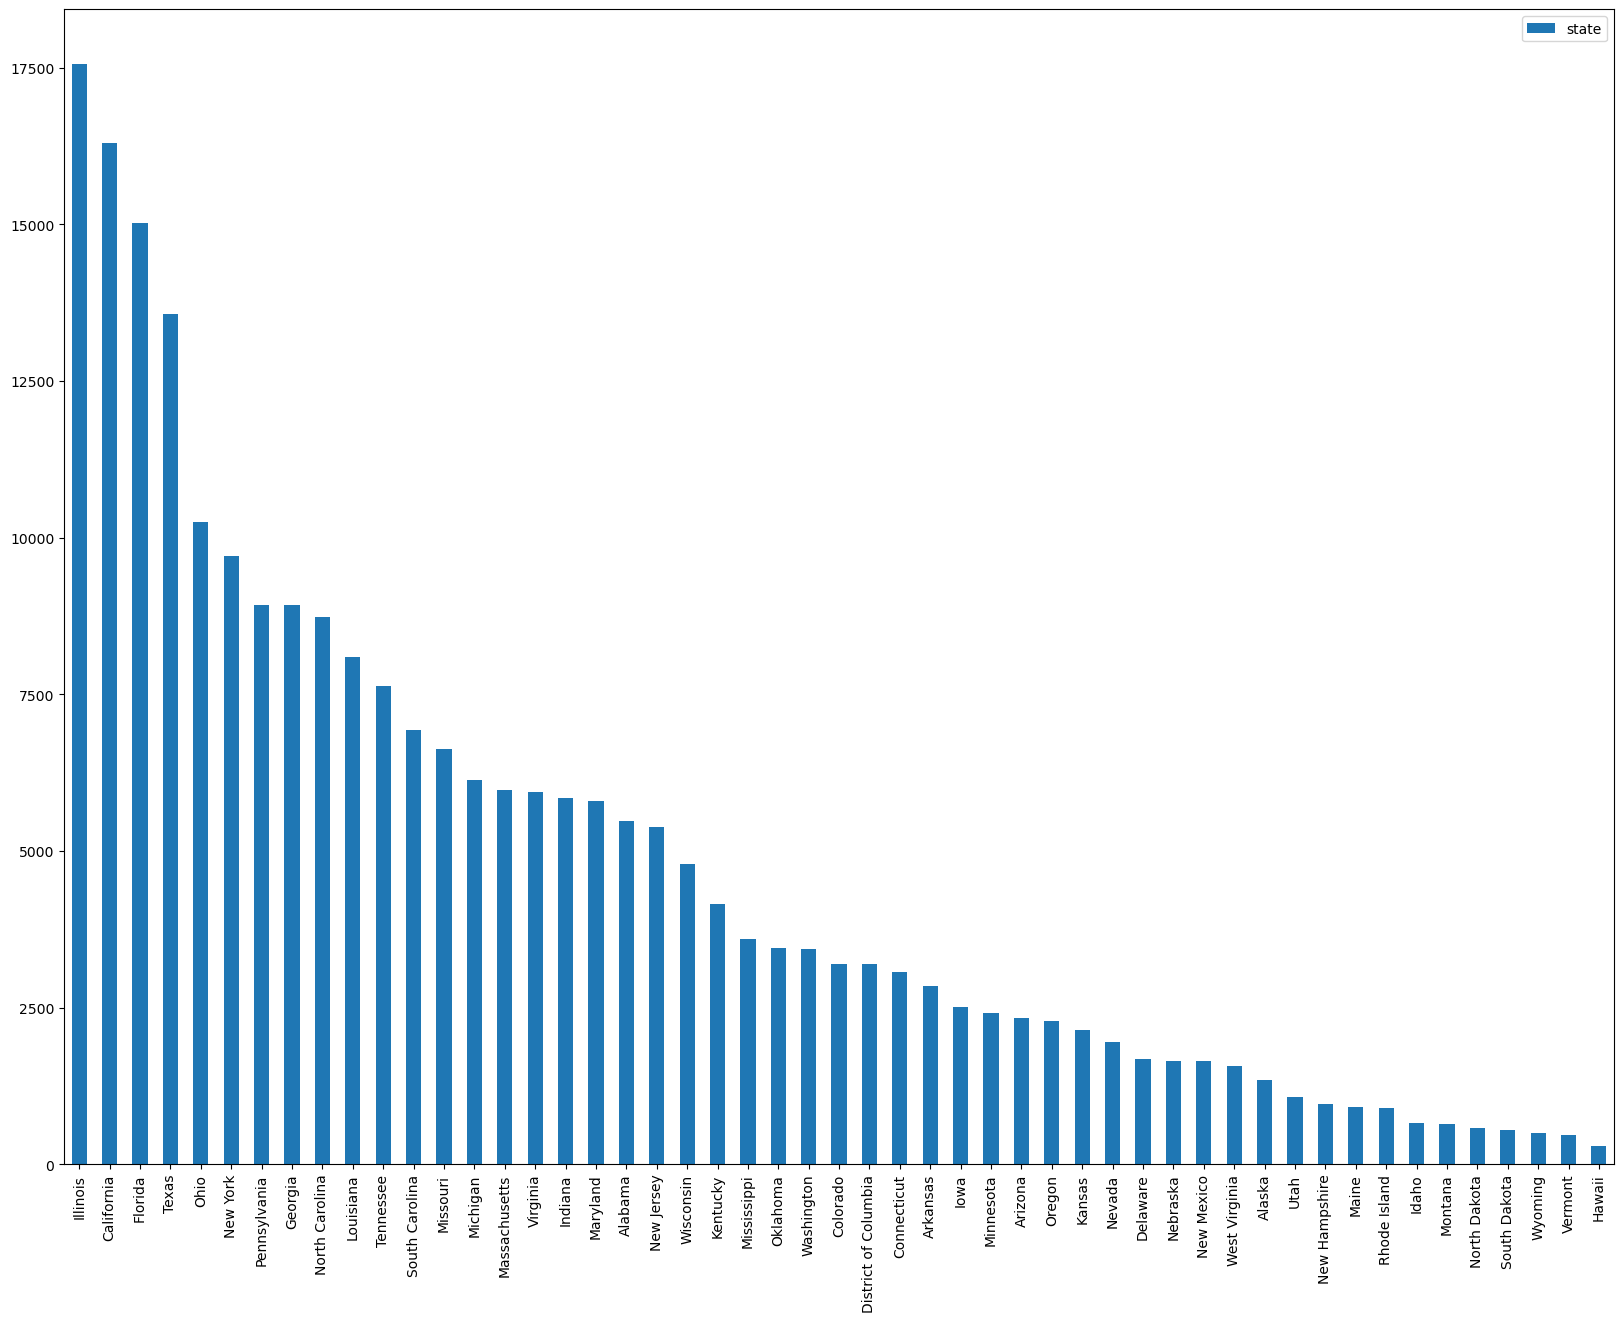

In [82]:
#Checking the 'state' distribution counts
pd.DataFrame(df1['state'].value_counts()).plot(kind ='bar', figsize= (20,15))

## Exporting final data set, and saving the notebook.

In [92]:
df1.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'gun_violence_script1.csv')) 